In [25]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt     
%matplotlib inline
from scipy.stats import iqr
from scipy.stats.stats import pearsonr

In [26]:
salary_df = pd.read_csv('salary.csv')

In [27]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [28]:
salary_df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [29]:
salary_df = salary_df.dropna(how='any',axis=0) 

In [30]:
salary_df.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [31]:
display(salary_df['salary'].min())
display(salary_df['salary'].max())

29000.0

96156.0

In [32]:
salary_df['salary'].mean()

50863.22009783626

In [33]:
salary_df['salary'].sem()

560.0622753925232

In [34]:
np.std(salary_df['yearsworked'])

9.437828327328845

In [35]:
salary_df['salary'].median()

50096.0

In [36]:
iqr(salary_df['salary'])

20345.0

In [37]:
salary_df['male'].value_counts()

1    385
0    128
Name: male, dtype: int64

In [38]:
salary_df['male'] =  salary_df['male'].map({0: 'female', 1: 'male'})
salary_df.groupby(['position', 'male']).size()

position  male  
1         female     60
          male       83
2         female     49
          male      111
3         female     19
          male      191
dtype: int64

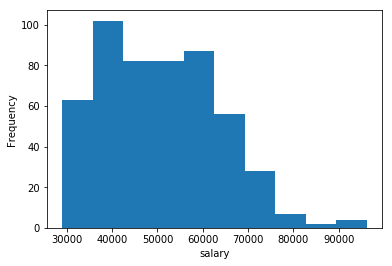

In [39]:
salary_df['salary'].plot(kind='hist')
plt.xlabel('salary')
plt.show()

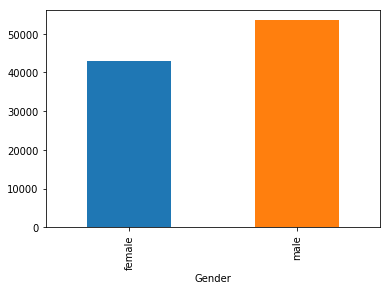

In [40]:
avg_salary = salary_df.groupby('male').mean()
avg_salary['salary'].plot(kind='bar')
#plt.errorbar(avg_salary.index, avg_salary['salary'], yerr=avg_salary['salary'])
plt.xlabel('Gender')
plt.show()

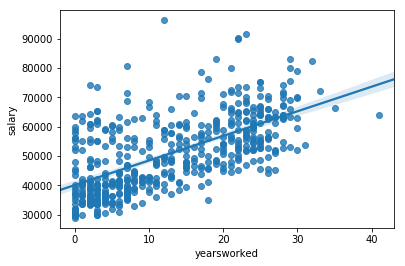

In [43]:
sns.regplot(salary_df['yearsworked'], salary_df['salary'])


In [42]:
pearsonr(salary_df['yearsworked'], salary_df['salary'])

(0.6235888657598045, 1.2873351342921916e-56)